In [1]:
function euler_forward(odefun, t0, t1, y0, numSteps)

  # calculate time step dt
  dt = (t1 - t0)/numSteps;

  # initialize t and u as column vectors
  t = linspace(t0, t1, numSteps+1);
  y = zeros(size(t)); y[1] = y0;

  # calculate u(t_n)
  for k = 1:numSteps
    y[k+1] = y[k] + dt*odefun(t[k], y[k]);
  end

  return t, y
end



euler_forward (generic function with 1 method)

In [2]:
# euler_backward Euler approximation for ODE initial value problem
#               Backward Euler method
# [t, u] = euler_backward(f, t0, t1, u0, n) returns a column vector of time
# points and a column vector of function values,
# f = f(t, u) is the RHS,
# t0 is the initial time,
# t1 is the final time,
# u0 is the initial function value,
# n is the number of steps of the numerical method
#
# Lei Zhang, 03-03-2015
function euler_backward(f, fy, t0, t1, y0, numSteps)

  # calculate time step dt
  dt = (t1 - t0)/numSteps;

  # initialize t and y as column vectors
  t = linspace(t0, t1, numSteps+1);
  y = zeros(size(t)); y[1] = y0;

  for k = 1 : numSteps
    Y = y[k] + dt * f(t[k], y[k]);

    # Newton iteration
    (Y, isConverged)= newton4euler(f, fy, t[k+1], y[k], Y, dt);

    if ~isConverged
      msg = @sprintf("back_euler failed to converge at step %d", k);
      error(msg);
    end

    y[k+1] = Y;
  end
  return t, y
end


function newton4euler(f,fy,t,y,Y,h)

TOL = 1.e-6;
MAXITS = 100;

isConverged= false;  # starts out FALSE
for n=1:MAXITS
  fValue = f(t, Y);
  fPartial = fy(t, Y);
  F = y + h * fValue - Y;
  dFdY = h * fPartial - 1;
  increment=dFdY\F;
  Y = Y - increment;
  if norm(increment,Inf) <= TOL*norm(Y,Inf)
    isConverged= true;  # turns TRUE here
    return Y, isConverged
  end
end

return Y, isConverged
end


elapsed time: 2.1839e-5 seconds


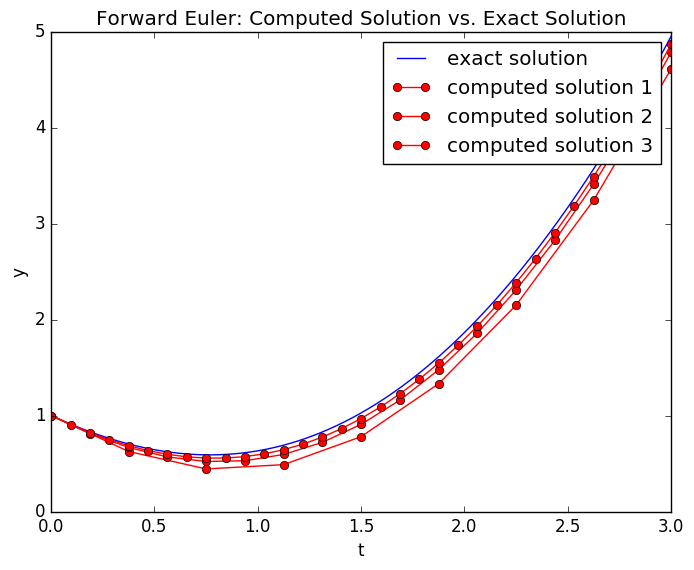

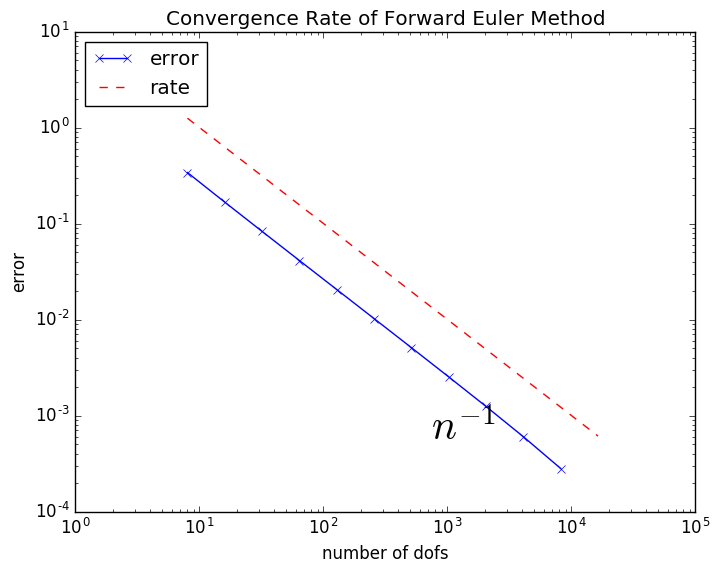

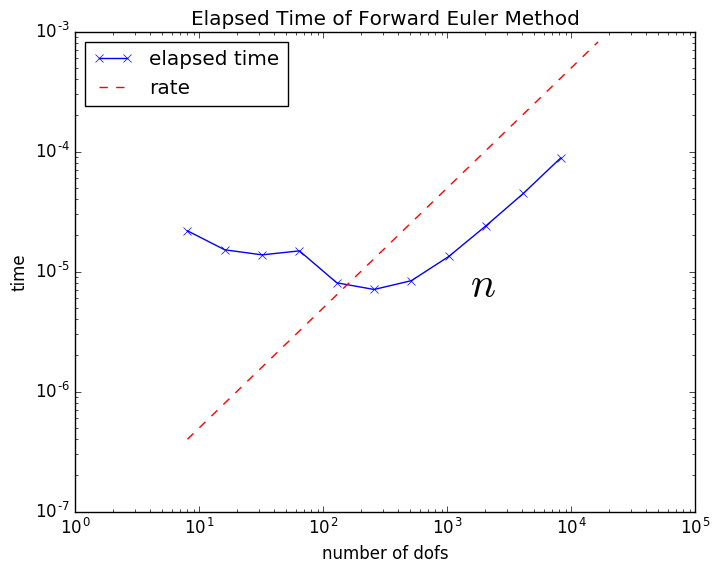

elapsed time: 1.2873e-5 seconds
elapsed time: 1.3767e-5 seconds
elapsed time: 1.4866e-5 seconds
elapsed time: 8.055e-6 seconds
elapsed time: 7.086e-6 seconds
elapsed time: 8.394e-6 seconds
elapsed time: 1.3345e-5 seconds
elapsed time: 2.4085e-5 seconds
elapsed time: 4.4771e-5 seconds
elapsed time: 8.8516e-5 seconds


PyObject <matplotlib.text.Annotation object at 0x31e5d64d0>

In [3]:
using Match

N = 6;

@match N begin
  1 => odefun(t, y)=pi*cos(pi*t);
  2 => odefun(t, y)=(t + y);
  3 => odefun(t, y)=exp(t);
  4 => odefun(t, y)=-20*y + 20*t + 1;
  5 => odefun(t, y)=y.^2.*(t-t.^3);
  6 => odefun(t, y)=t.^2 - y;
  _ => println("no such case.")
end

t0 = 0;
t1 = 3;
y0 = 1;

n_ex = 2^16;
(t_ex, y_ex) = euler_forward(odefun, t0, t1, y0, n_ex);

using PyPlot
PyPlot.figure()
plot(t_ex, y_ex, c="blue")
title("Forward Euler: Computed Solution vs. Exact Solution")
xlabel("t"); ylabel("y")
hold(true)

len = 12;
e = zeros(len);
t_elapsed = zeros(len);
n = [2.^i for i=3:3+len-1];
k = 1;
while k < len
    tic();
    (t, y) = euler_forward(odefun, t0, t1, y0, n[k]);
    t_elapsed[k] = toc();
    if k<=3
        plot(t, y, c="red", marker="o", linestyle="-")
    end
    st=convert(Int, n_ex/n[k]);
    e[k] = maximum(abs(y - y_ex[1:st:end]));
    k += 1;
end
legend(["exact solution", "computed solution 1", "computed solution 2", "computed solution 3"], loc="upper right")
#hold(false)

PyPlot.figure() # accuracy
loglog(n, e, marker="x");
function polyfit(x, y, n)
  A = [ float(x[i])^p for i = 1:length(x), p = 0:n ]
  A \ y
end
P = polyfit(log(e), log(n), 1)
hold(true)
loglog(n, 10./n, c="red", linestyle="--");
title("Convergence Rate of Forward Euler Method")
xlabel("number of dofs"); ylabel("error");
legend(["error", "rate"], loc="upper left")
annotate(L"n^{-1}",
    xy=[0.7;0.1],
    xycoords="axes fraction",
    xytext=[-10,10],
    textcoords="offset points",
    fontsize=30.0,
    ha="right",
    va="bottom")

PyPlot.figure() # execute time
loglog(n, t_elapsed, marker="x")
P = polyfit(log(t_elapsed), log(n), 1)
hold(true)
loglog(n, 5e-8*n, c="red", linestyle="--");
title("Elapsed Time of Forward Euler Method")
xlabel("number of dofs"); ylabel("time");
legend(["elapsed time", "rate"], loc="upper left")
annotate(L"n",
    xy=[0.7;0.4],
    xycoords="axes fraction",
    xytext=[-10,10],
    textcoords="offset points",
    fontsize=30.0,
    ha="right",
    va="bottom")


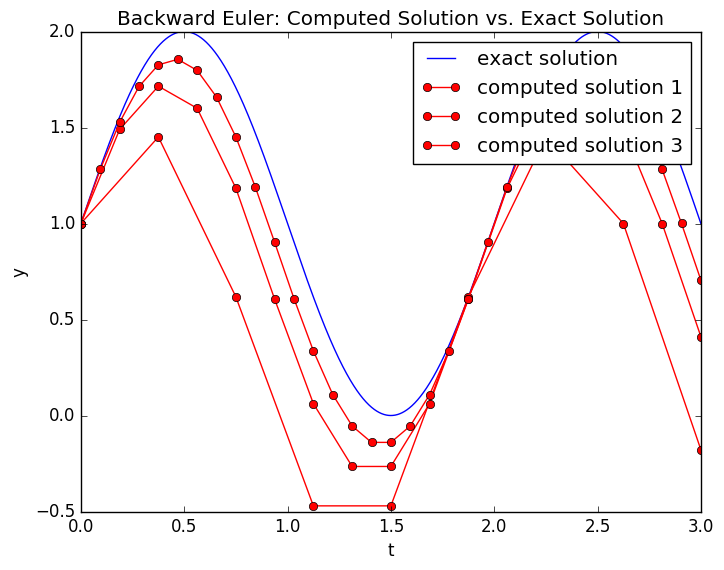

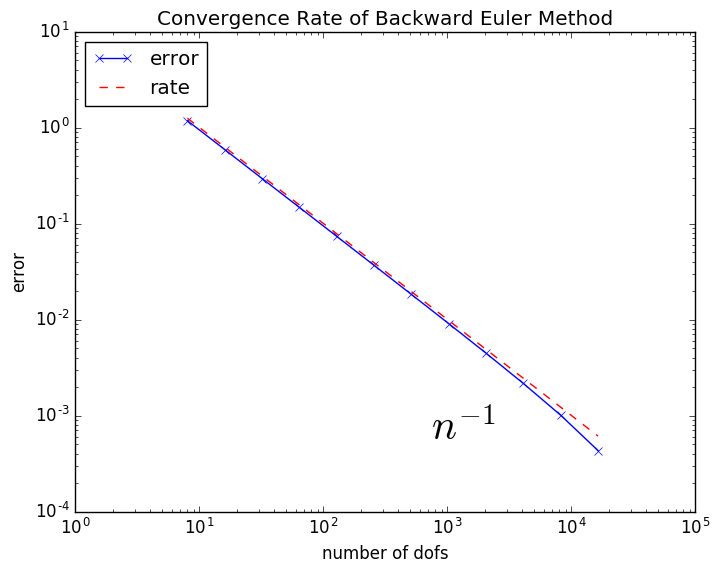

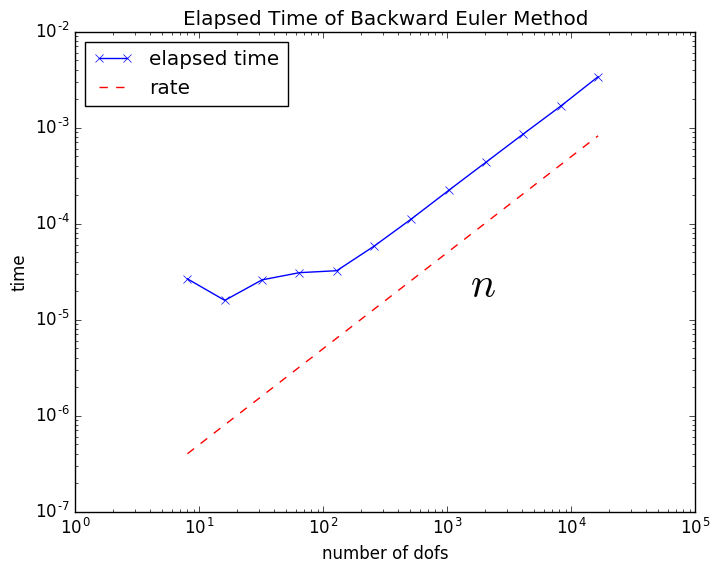

elapsed time: 2.6518e-5 seconds
elapsed time: 1.583e-5 seconds
elapsed time: 2.5901e-5 seconds
elapsed time: 3.0767e-5 seconds
elapsed time: 3.2259e-5 seconds
elapsed time: 5.8094e-5 seconds
elapsed time: 0.000111666 seconds
elapsed time: 0.000221699 seconds
elapsed time: 0.000435947 seconds
elapsed time: 0.000857999 seconds
elapsed time: 0.001671015 seconds
elapsed time: 0.003381811 seconds


PyObject <matplotlib.text.Annotation object at 0x31fb9c6d0>

In [4]:
using Match

N = 1;

@match N begin
  1 => begin odefun(t, y)=pi*cos(pi*t); odefuny(t,y)=0; end
  2 => begin odefun(t, y)=(t + y); odefuny(t,y)=1; end
  3 => begin odefun(t, y)=exp(t); odefuny(t,y)=0; end
  4 => begin odefun(t, y)=-20*y + 20*t + 1; odefuny(t,y) = -20; end
  5 => begin odefun(t, y)=y.^2.*(t-t.^3); odefuny(t,y) =y.*(t-t.^3); end
  6 => begin odefun(t, y)=t.^2 - y; odefuny(t,y) = -1; end
  7 => begin odefun(t, y)=y.^(0.2); odefuny(t, y)=0.2*y.^(-0.8); end
  _ => println("no such case.")
end

t0 = 0;
t1 = 3;
y0 = 1;

n_ex = 2^16;
(t_ex, y_ex) = euler_backward(odefun, odefuny, t0, t1, y0, n_ex);

using PyPlot
PyPlot.figure()
plot(t_ex, y_ex, c="blue")
title("Backward Euler: Computed Solution vs. Exact Solution")
xlabel("t"); ylabel("y")
hold(true)

len = 12;
e = zeros(len);
t_elapsed = zeros(len);
n = [2.^i for i=3:3+len-1];
for k = 1:len
    tic();
    (t, y) = euler_backward(odefun, odefuny, t0, t1, y0, n[k]);
    t_elapsed[k] = toc();
    if k<=3
        plot(t, y, c="red", marker="o", linestyle="-")
    end
    st=convert(Int, n_ex/n[k]);
    e[k] = maximum(abs(y - y_ex[1:st:end]));
end
legend(["exact solution", "computed solution 1", "computed solution 2", "computed solution 3"], loc="upper right")
hold(false)

PyPlot.figure() # accuracy
loglog(n, e, marker="x");
function polyfit(x, y, n)
  A = [ float(x[i])^p for i = 1:length(x), p = 0:n ]
  A \ y
end
P = polyfit(log(e), log(n), 1)
hold(true)
loglog(n, 10./n, c="red", linestyle="--");
title("Convergence Rate of Backward Euler Method")
xlabel("number of dofs"); ylabel("error");
legend(["error", "rate"], loc="upper left")
annotate(L"n^{-1}",
    xy=[0.7;0.1],
    xycoords="axes fraction",
    xytext=[-10,10],
    textcoords="offset points",
    fontsize=30.0,
    ha="right",
    va="bottom")

PyPlot.figure() # execute time
loglog(n, t_elapsed, marker="x")
P = polyfit(log(t_elapsed), log(n), 1)
hold(true)
loglog(n, 5e-8*n, c="red", linestyle="--");
title("Elapsed Time of Backward Euler Method")
xlabel("number of dofs"); ylabel("time");
legend(["elapsed time", "rate"], loc="upper left")
annotate(L"n",
    xy=[0.7;0.4],
    xycoords="axes fraction",
    xytext=[-10,10],
    textcoords="offset points",
    fontsize=30.0,
    ha="right",
    va="bottom")


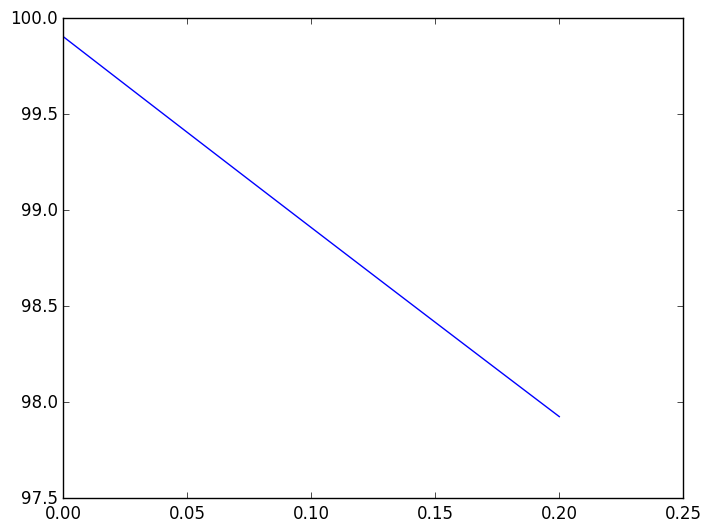

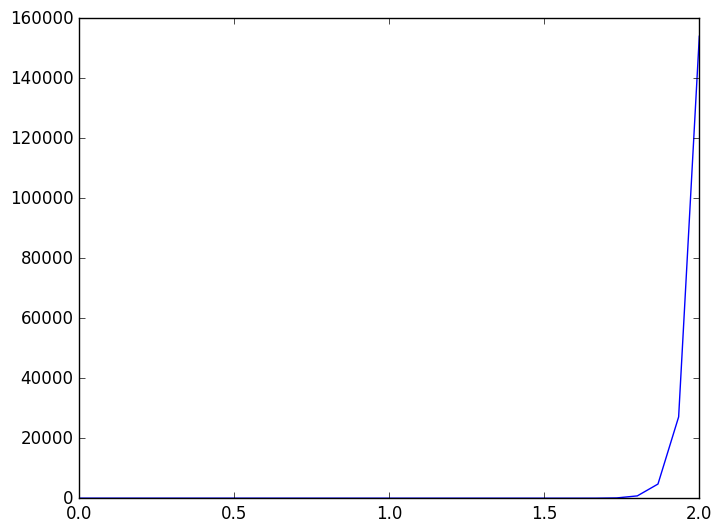

In [6]:
# Lei Zhang, 14-03-2016
function stiffode(N::Integer, T::Float64)

  y0 = [1; 999/10];
  y = zeros(2, N+1);

  y[:,1] = y0;
  L = [-100 1; 0 -1/10];

  h = T/N;
    t = h*collect(0:N);
  for i = 1:N
    y[:,i+1] = (eye(2)+h*L)*y[:,i];
  end
    
  return t, y
end

using PyPlot

PyPlot.figure()
(t, y) = stiffode(30, 0.2);
y2 = sqrt(sum(y.^2, 1));
plot(t, y2[1,:], c="blue");

PyPlot.figure()
(t, y) = stiffode(30, 2.0);
y2 = sqrt(sum(y.^2, 1));
plot(t, y2[1,:], c="blue");


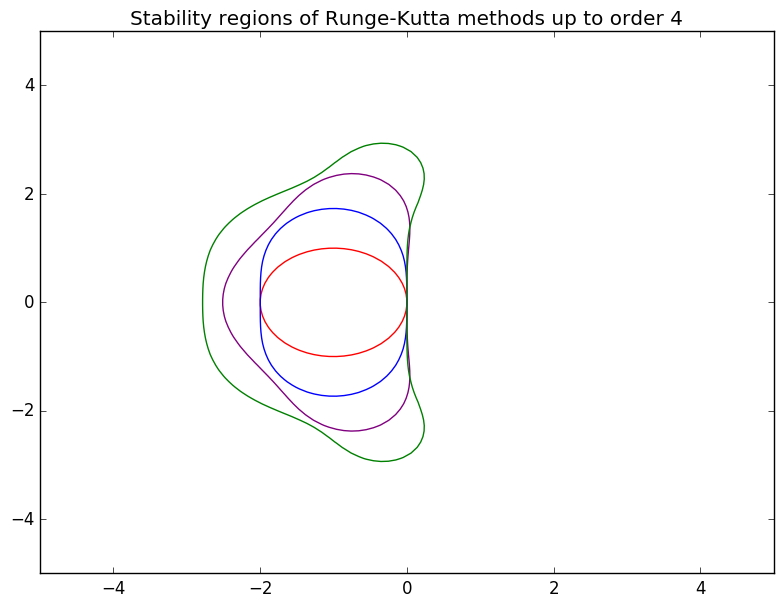

/Users/work/anaconda/lib/python2.7/site-packages/numpy/ma/core.py:6434: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
/Users/work/anaconda/lib/python2.7/site-packages/numpy/ma/core.py:6434: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


PyObject <matplotlib.text.Text object at 0x31aceb890>

In [1]:
choice = 1;
n = 100;
using Match
@match choice begin
  1=> # whole region
  begin
    x = linspace(-5, 5, n);
    y = linspace(-5, 5, n);
  end
  2=> # close to 0
  begin
    x = linspace(-0.05, 0.05, n);
    y = linspace(-0.05, 0.05, n);
  end
end

xgrid = repmat(x', n, 1);
ygrid = repmat(y, 1, n);

Mu = xgrid+im*ygrid;
R1 = 1 + Mu;
R2 = R1 + .5*Mu.^2;
R3 = R2 + (1/6)*Mu.^3;
R4 = R3 + (1/24)*Mu.^4;
Rhat1 = abs(R1);
Rhat2 = abs(R2);
Rhat3 = abs(R3);
Rhat4 = abs(R4);

using PyPlot
fig = PyPlot.figure();
ax=gca();
hold(true)
ax[:contour](xgrid, ygrid, Rhat1, [1], colors="red"); # plot the contour line for abs(R) = 1
tight_layout();
ax[:contour](xgrid, ygrid, Rhat2, [1], colors="blue");
pause(3)
tight_layout();
ax[:contour](xgrid, ygrid, Rhat3, [1], colors="purple");
pause(3)
tight_layout();
ax[:contour](xgrid, ygrid, Rhat4, [1], colors="green");
pause(3)
tight_layout();
#legend(["RK1","RK2","RK3","RK4"], loc="upper left")
#line([-4 4],[0 0]);
#line([0 0],[-4 4]);
title("Stability regions of Runge-Kutta methods up to order 4")
